## Task 1

1.C - Transform Encoding  

2.C - 3 columns  

3.A - Min-Max Scaling  

4.A - mean = 0, standard deviation = 1  

5.C - Histogram  

6.B - Treemap  

7.B - Positively skewed  

8.D - Feature Engineering  

9.B - Principal Component Analysis (PCA)  



## Task 2


##### In the section of Ordinal Encoding, shouldnt that be called label encoding because the data is already in 1,2,3 and it needs to be changed to first,second and third class. 

#### Load the necesasry libraries

In [2]:
#import the necessary libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd



#### Data Loading and Exploration 

In [17]:
#load the dataset 
data = pd.read_csv("Titanic-Dataset.csv")


In [4]:
#display the first 5 rows of the dataset 
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Encoding 

In [5]:
#1. encoded dataset according to one-hot coding 
data_encoded = pd.get_dummies(data, columns = ['Sex'], dtype = int)
data_encoded.head(5) 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [6]:
#Ordinal Encoding 
data_encoded['Pclass_encoded'] = data_encoded["Pclass"].replace({1:"First Class", 2:"Second Class", 3:"Third Class"})
data_encoded.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_encoded
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,First Class
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,First Class
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,Third Class


#### Standardization 

In [7]:
mean_age = data_encoded['Age'].mean()
std_age = data_encoded['Age'].std()

data_encoded['Age_standardized'] = (data_encoded['Age'] - mean_age)/std_age
data_encoded.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_encoded,Age_standardized
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Third Class,-0.530005
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,First Class,0.571430
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Third Class,-0.254646
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,First Class,0.364911
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,Third Class,0.364911


#### Data Visualization using Matplotlib

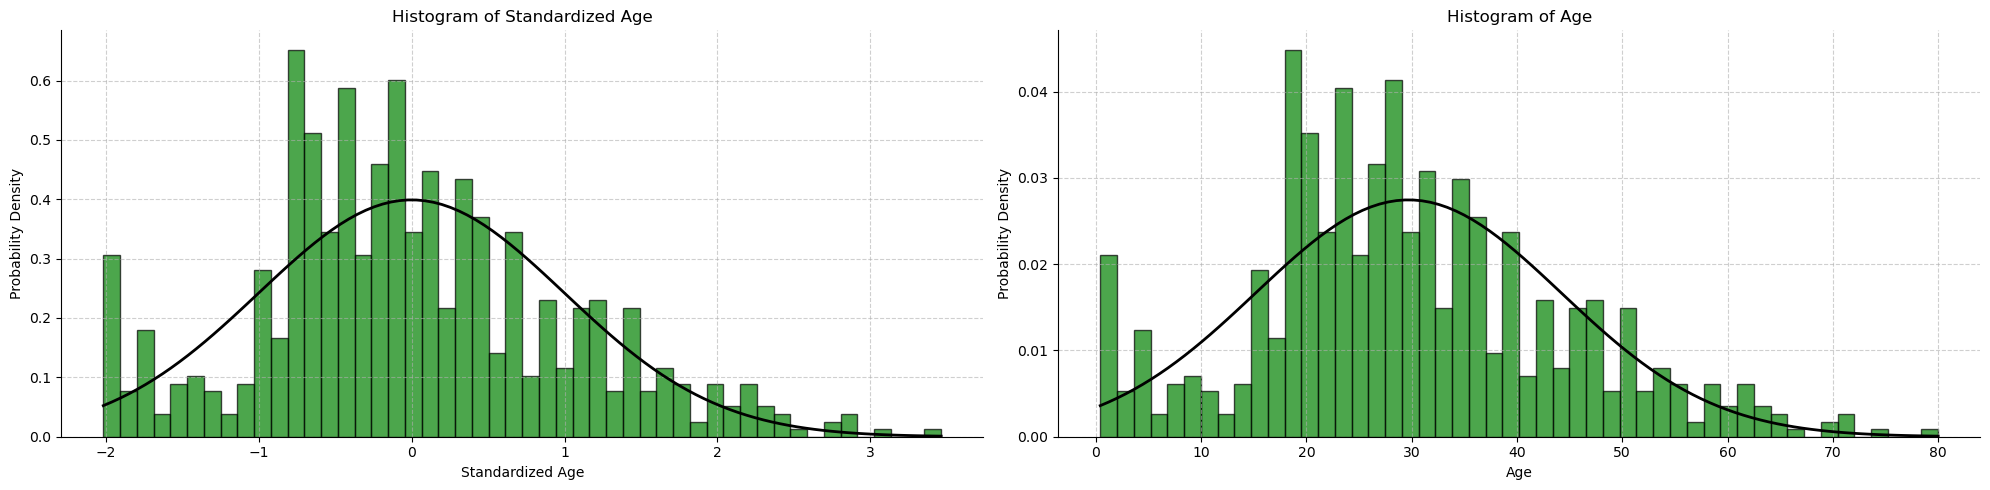

Distribution is positively skewed with mean 29.7 > 24.0 and there are 177 missing values


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data_age_standardized = data_encoded['Age_standardized']
data_age = data['Age']

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

for idx, (value, title) in enumerate(zip([data_age_standardized, data_age], ['Standardized Age', 'Age'])):
    mean = value.mean()
    sigma = value.std()
    bins = 50
    x = np.linspace(value.min(), value.max(), 100)
    pdf = norm.pdf(x, mean, sigma)

    ax = axes[idx]
    ax.hist(value, bins=bins, density=True, color='green', alpha=0.7, edgecolor='black')
    ax.plot(x, pdf, 'k-', lw=2)

    ax.set_xlabel(title)
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Histogram of {title}')

    ax.grid(True, linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print the distribution information
if data_age.mean() > data_age.median():
    print(f"Distribution is positively skewed with mean {round(data_age.mean(), 2)} > {round(data_age.mode()[0], 2)} and there are {data_age.isna().sum()} missing values")
elif data_age.mean() == data_age.mode():
    print(f"Distribution is negatively skewed with mean {round(data_age.mean(), 2)} < {round(data_age.mode()[0], 2)} and there are {data_age.isna().sum()} missing values")
else: 
    print("Symmetrical distribution")


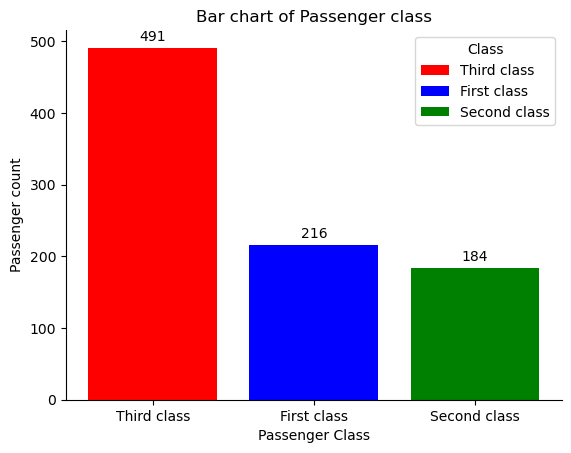

In [19]:
#extract all necessary values for the bar plot
Pclass = data_encoded['Pclass_encoded'].unique()
counts = data_encoded['Pclass_encoded'].value_counts()
bar_labels = ['Third class', 'First class', 'Second class']
bar_colors = ['red', 'blue', 'green']

#create figure and the bar plot 
fig, ax = plt.subplots()
bars = ax.bar(Pclass,counts, label=bar_labels, color=bar_colors)

# Add data labels above each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

#set labels for the bar plots 
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Passenger count')
ax.set_title('Bar chart of Passenger class')

#add legend to the plot 
ax.legend(title='Class')

#Set ticks and remove the grid line at the top and right  
ax.set_xticks(Pclass)
ax.set_xticklabels(bar_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


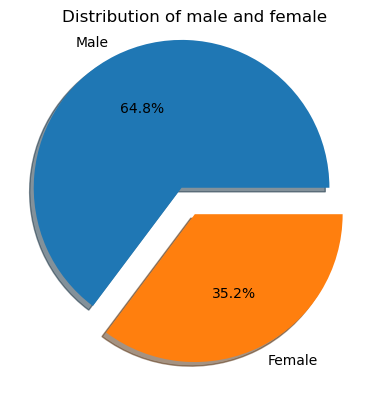

 Male count: 577, Female count: 314


In [20]:
#extract the value counts of male and female 
y = np.array([data['Sex'].value_counts().iloc[0], data['Sex'].value_counts().iloc[1]])
labels = ['Male', 'Female']

#create a partition between the two areas
explode = [0.2, 0]

#plot the pie chart and set title 
plt.pie(y, labels =labels, shadow = True, explode = explode, autopct='%1.1f%%')
plt.title("Distribution of male and female")
plt.show()

print(f" Male count: {data['Sex'].value_counts().iloc[0]}, Female count: {data['Sex'].value_counts().iloc[1]}")


#### Brief Write-up

Histogram 
The histogram demonstrates that there is more density for passengers aged between 18 to 52. Highest probability density was recorded for passengers aged 18,22 and 24. Ages range from  3 year old babies to 80 year olds. The thin tails of the distribution indicate fewer young and old people, in comparison to middle aged people.However, there is 177 missing data in age column which makes it difficult to get an accurate picture. From a visual perspective, the distribution resembles a normal distribution bell-curve. But, given that the mean is greater than the median it indicates positive skewness. 

Bar chart 
There is a large class disparity amongst the passengers. The highest count of passenger is in the third class. The difference in passenger count between first and second class is very few. However, the data is imbalanced due to such a large number allocated to the third class. 

Pie chart 
The pie chart demonstrates that majority of the passengers were male constituting 65% of the chart whilst only 35% were women on the titanic. There were 891 passengers of which 577 were men and 314 where women. 
